# Reading, cleaning and filtering data

In [1]:
import pandas as pd


df = pd.read_csv("us_stocks.csv")
df["time"] = pd.to_datetime(df["date"])
df = df.loc[
    df["time"] >= pd.to_datetime("2000-01-01"),
    ["ticker", "time", "adj_open", "adj_high", "adj_low", "adj_close"],
].copy()
df.columns = ["ticker", "time", "open", "high", "low", "close"]
df

,ticker,time,open,high,low,close
30,A,2000-01-03,53.726454,53.856080,45.969377,49.121329
31,A,2000-01-04,46.481058,46.992738,44.175084,45.369006
32,A,2000-01-05,45.198445,45.239380,41.828176,41.998737
33,A,2000-01-06,42.046493,42.298923,39.658651,40.934441
34,A,2000-01-07,40.293135,44.986951,40.252200,44.345645
...,...,...,...,...,...,...
15389309,ZUMZ,2018-03-21,23.800000,24.600000,23.605800,23.950000
15389310,ZUMZ,2018-03-22,23.900000,24.350000,23.300000,23.350000
15389311,ZUMZ,2018-03-23,23.550000,24.200000,23.450000,23.550000
15389312,ZUMZ,2018-03-26,23.750000,24.800000,23.700000,24.650000


In [3]:
zqk = df.loc[(df.ticker=="ZQK") & (df["time"].dt.year==2000),]
zqk

,ticker,time,open,high,low,close
15380828,ZQK,2000-01-03,3.8450,3.8450,3.6875,3.7025
15380829,ZQK,2000-01-04,3.6575,3.6575,3.3900,3.5475
15380830,ZQK,2000-01-05,3.5150,3.5625,3.4850,3.4850
15380831,ZQK,2000-01-06,3.4850,3.5950,3.4700,3.4850
15380832,ZQK,2000-01-07,3.4700,3.5475,3.4375,3.4850
...,...,...,...,...,...,...
15381075,ZQK,2000-12-22,4.0475,4.7500,4.0150,4.6100
15381076,ZQK,2000-12-26,4.5625,4.5950,4.2650,4.5625
15381077,ZQK,2000-12-27,4.5950,4.6575,4.4700,4.6575
15381078,ZQK,2000-12-28,4.6875,4.8450,4.6875,4.7975


# Visualization

## Altair

For the visualization, I consider the [example with Altair](https://altair-viz.github.io/gallery/candlestick_chart.html) with the necessary modifications:

In [4]:
import altair as alt



open_close_color = alt.condition("datum.open <= datum.close",
                                 alt.value("#06982d"),
                                 alt.value("#ae1325"))

base = alt.Chart(zqk).encode(
    alt.X('time:T',
          axis=alt.Axis(
              format='%Y/%m/%d',
              title=''
          )
    ),
    color=open_close_color
)

rule = base.mark_rule().encode(
    alt.Y(
        'low:Q',
        title='Price',
        scale=alt.Scale(zero=False),
    ),
    alt.Y2('high:Q')
)

bar = base.mark_bar().encode(
    alt.Y('open:Q'),
    alt.Y2('close:Q')
)

rule + bar

alt.LayerChart(...)

## mplfinance

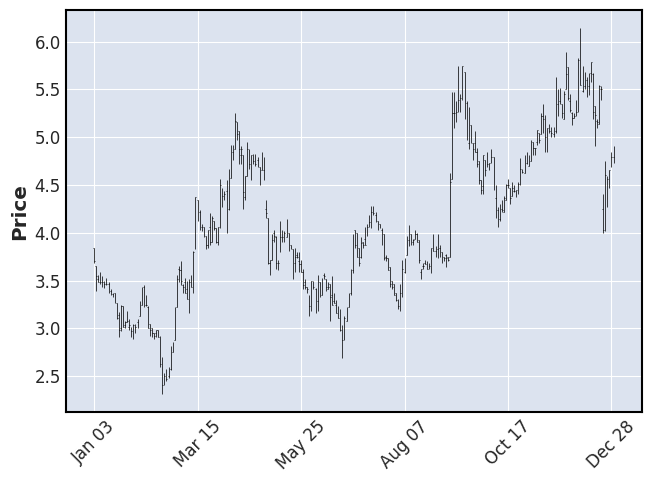

In [5]:
import mplfinance as mpf


mpf.plot(zqk.set_index("time"))

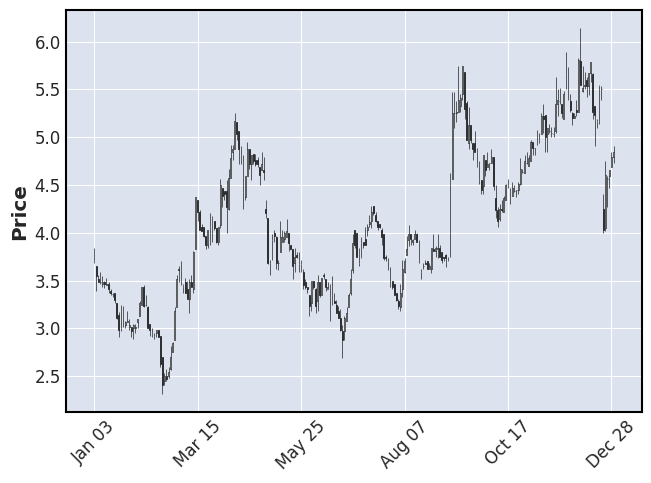

In [6]:
mpf.plot(zqk.set_index("time"), type="candle");

# Features

## Point I - Preparing train and test datasets

Reading from the stored file:

In [18]:
import pandas as pd


df = pd.read_csv("us_stocks.csv")
df["time"] = pd.to_datetime(df["date"])
df = df.loc[
    (df["time"] >= pd.to_datetime("2006-01-01")) & (df["time"] < pd.to_datetime("2016-01-01")),
    ["ticker", "time", "adj_open", "adj_high", "adj_low", "adj_close", "volume"],
].copy()
df.columns = ["ticker", "time", "open", "high", "low", "close", "volume"]
df

,ticker,time,open,high,low,close,volume
1538,A,2006-01-03,22.786839,22.909642,22.387796,22.855063,3796200.0
1539,A,2006-01-04,22.889175,23.080202,22.766372,22.916465,3001300.0
1540,A,2006-01-05,22.820951,23.516836,22.820951,23.516836,3458800.0
1541,A,2006-01-06,23.537304,23.735153,23.257585,23.639640,4396500.0
1542,A,2006-01-09,23.639640,23.741976,23.482724,23.571416,2920500.0
...,...,...,...,...,...,...,...
15388748,ZUMZ,2015-12-24,15.960000,16.050000,15.570000,15.630000,180743.0
15388749,ZUMZ,2015-12-28,15.420000,15.780000,15.310000,15.440000,269595.0
15388750,ZUMZ,2015-12-29,15.440000,16.120000,15.440000,16.040000,306395.0
15388751,ZUMZ,2015-12-30,16.060000,16.220000,15.320000,15.530000,291792.0


## Point II - Filtering data

In [19]:
df["dollar_volume"] = df["volume"]*df["close"]
df["row_number"] = range(df.shape[0])
df

,ticker,time,open,high,low,close,volume,dollar_volume,row_number
1538,A,2006-01-03,22.786839,22.909642,22.387796,22.855063,3796200.0,8.676239e+07,0
1539,A,2006-01-04,22.889175,23.080202,22.766372,22.916465,3001300.0,6.877919e+07,1
1540,A,2006-01-05,22.820951,23.516836,22.820951,23.516836,3458800.0,8.134003e+07,2
1541,A,2006-01-06,23.537304,23.735153,23.257585,23.639640,4396500.0,1.039317e+08,3
1542,A,2006-01-09,23.639640,23.741976,23.482724,23.571416,2920500.0,6.884032e+07,4
...,...,...,...,...,...,...,...,...,...
15388748,ZUMZ,2015-12-24,15.960000,16.050000,15.570000,15.630000,180743.0,2.825013e+06,6836682
15388749,ZUMZ,2015-12-28,15.420000,15.780000,15.310000,15.440000,269595.0,4.162547e+06,6836683
15388750,ZUMZ,2015-12-29,15.440000,16.120000,15.440000,16.040000,306395.0,4.914576e+06,6836684
15388751,ZUMZ,2015-12-30,16.060000,16.220000,15.320000,15.530000,291792.0,4.531530e+06,6836685


In [ ]:
mapa = df.groupby(["row_number", "ticker"])["dollar_volume"].rolling(window=5, min_periods=1).mean()
mapa

In [ ]:
mapa.reset_index()

In [ ]:
df

In [ ]:
df.merge(mapa.reset_index(), how="left", on=["row_number", "ticker"])

In [11]:
df["year"] = df["time"].dt.year
at_least_8_years = df.groupby("ticker")["year"].apply(lambda x: len(set(x)) >= 8)
df = df.loc[df["ticker"].map(at_least_8_years), ["ticker", "time", "open", "high", "low", "close", "volume"]]
df

,ticker,time,open,high,low,close,volume
1538,A,2006-01-03,22.786839,22.909642,22.387796,22.855063,3796200.0
1539,A,2006-01-04,22.889175,23.080202,22.766372,22.916465,3001300.0
1540,A,2006-01-05,22.820951,23.516836,22.820951,23.516836,3458800.0
1541,A,2006-01-06,23.537304,23.735153,23.257585,23.639640,4396500.0
1542,A,2006-01-09,23.639640,23.741976,23.482724,23.571416,2920500.0
...,...,...,...,...,...,...,...
15388748,ZUMZ,2015-12-24,15.960000,16.050000,15.570000,15.630000,180743.0
15388749,ZUMZ,2015-12-28,15.420000,15.780000,15.310000,15.440000,269595.0
15388750,ZUMZ,2015-12-29,15.440000,16.120000,15.440000,16.040000,306395.0
15388751,ZUMZ,2015-12-30,16.060000,16.220000,15.320000,15.530000,291792.0


## Point III - Exclude outliers

In [12]:
daily_returns = df.groupby('ticker')["close"].pct_change()
daily_returns

1538             NaN
1539        0.002687
1540        0.026198
1541        0.005222
1542       -0.002886
              ...   
15388748   -0.022514
15388749   -0.012156
15388750    0.038860
15388751   -0.031796
15388752   -0.026401
Name: close, Length: 6255803, dtype: float64

In [13]:
np.min(daily_returns)

NameError: name 'np' is not defined

In [ ]:
np.max(daily_returns)

In [ ]:
np.mean((daily_returns >= -1.0) & (daily_returns <= 1.0))

In [ ]:
df = df.loc[(daily_returns >= -1.0) & (daily_returns <= 1.0),]
df

## Saving train/validation datasets

In [ ]:
train = df.loc[
    (df["time"] >= pd.to_datetime("2006-01-01")) & (df["time"] < pd.to_datetime("2014-01-01")),]
test = df.loc[
    (df["time"] >= pd.to_datetime("2014-01-01")) & (df["time"] < pd.to_datetime("2016-01-01")),]
train.to_csv("train.csv", index=False)
test.to_csv("train.csv", index=False)